# Assignment_NeuralNetworks- Madhuri A

# Part A

   

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [99]:
from google.colab import drive

In [100]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
## 1.  Data import and Understanding [10 Marks]

In [6]:
## A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]


In [102]:

project_path = ''
dataset_file = project_path + '/content/drive/My Drive/Colab Notebooks/Signals.csv'
data_file  = '/content/drive/My Drive/Colab Notebooks/Signals.csv'
signals_df = pd.read_csv(dataset_file)
signals_df
print(signals_df.shape)
signals_df.columns
signals_df.dtypes
signals_df.head(5)

(1599, 12)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
signals_df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [104]:
## B. Check for missing values and print percentage for each attribute. [2 Marks]


In [106]:
percent_feature_missing = signals_df.isnull().sum() * 100 / len(signals_df)
missing_data_value_df = pd.DataFrame({'column_name': signals_df.columns,
                                 'percent_missing': percent_feature_missing})
missing_data_value_df



,column_name,percent_missing
Parameter 1,Parameter 1,0.0
Parameter 2,Parameter 2,0.0
Parameter 3,Parameter 3,0.0
Parameter 4,Parameter 4,0.0
Parameter 5,Parameter 5,0.0
Parameter 6,Parameter 6,0.0
Parameter 7,Parameter 7,0.0
Parameter 8,Parameter 8,0.0
Parameter 9,Parameter 9,0.0
Parameter 10,Parameter 10,0.0


No missing data.

In [11]:
## C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]


In [107]:

has_duplicates= signals_df.duplicated()

if True in has_duplicates.values:
    print('Duplicate exists in Dataframe')
else:
    print('No Duplicate exists in Dataframe')

Duplicate exists in Dataframe


In [14]:
signals_df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

In [110]:
#dropping duplicates
signals_df.drop_duplicates(inplace=True)

In [111]:
signals_df.shape

(1359, 12)

In [17]:
## D. Visualise distribution of the target variable. [2 Marks]


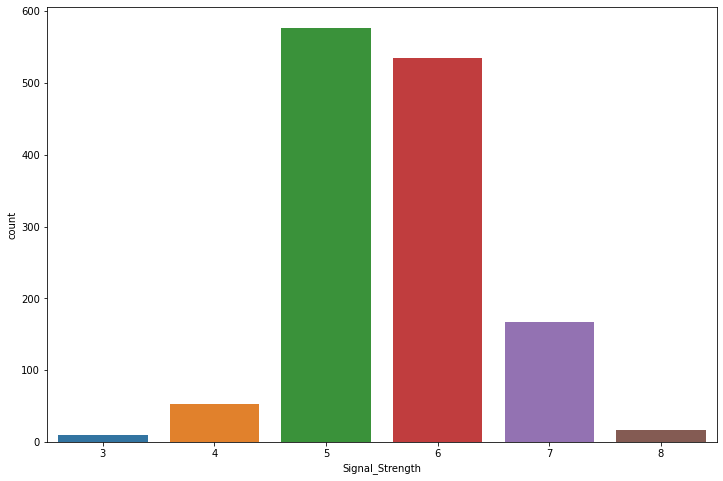

In [112]:
f, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="Signal_Strength", data=signals_df)
plt.show()

In [113]:
signals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


In [ ]:
## E. Share insights from the initial data analysis (at least 2). [2 Marks]

In [20]:
print("1. Signal strength is divided into 6 units/classes.")
print("2. Most of the signals have 5 or 6 signal strenghth.")

1. Signal strength is divided into 6 units/classes.
2. Most of the signals have 5 or 6 signal strenghth.


In [21]:
##2. Data preprocessing [7 Marks]


In [ ]:
##A. Split the data into X & Y. [1 Marks]


In [114]:
X = signals_df.values[:,:11]  ## Features
y = signals_df.values[:,11] 



In [23]:
##B. Split the data into train & test with 70:30 proportion.[1 Marks]


In [115]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)


In [25]:
##C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]


In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [ ]:
##D. Normalise the train and test data with appropriate method. [2 Marks]


In [117]:
# Feature Scaling

X_train = preprocessing.normalize(X_train)

X_test = preprocessing.normalize(X_test)

In [119]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
##E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [120]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [121]:
y_test.shape

(408, 9)

In [122]:
y_train.shape

(951, 9)

In [ ]:
#3. Model Training & Evaluation using Neural Network [13 Marks]


In [ ]:
## A. Design a Neural Network to train a classifier. [3 Marks]


In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Initializing the ANN
classifier = Sequential()

In [124]:
 # Creating a `Sequential` model and adding a Dense layer as the first layer.
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.Input(shape=(11,)))
classifier.add(tf.keras.layers.Dense(50, activation='relu'))

#classifier.add(tf.keras.layers.Dense(32,activation='relu'))
classifier.add(Dense(9, activation = 'softmax'))
classifier.output_shape

(None, 9)

In [125]:
# Creating optimizer with default learning rate
# sgd_optimizer = tf.keras.optimizers.SGD()
# Compile the model
classifier.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])

In [126]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                600       
                                                                 
 dense_10 (Dense)            (None, 9)                 459       
                                                                 
Total params: 1,059
Trainable params: 1,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## B. Train the classifier using previously designed Architecture [2 Marks]


In [127]:
history= classifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.0950 - accuracy: 0.4311 - val_loss: 0.0950 - val_accuracy: 0.4093
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.4311 - val_loss: 0.0948 - val_accuracy: 0.4093
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.4311 - val_loss: 0.0947 - val_accuracy: 0.4093
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0945 - accuracy: 0.4311 - val_loss: 0.0945 - val_accuracy: 0.4093
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.4311 - val_loss: 0.0943 - val_accuracy: 0.4093
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.4311 - val_loss: 0.0942 - val_accuracy: 0.4093
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.4311 - val_loss: 0.0940 - val_accuracy: 0.4093
Epoch 8/100
3

In [128]:
results = classifier.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.4093


In [ ]:
## C. Plot 2 separate visuals. [3 Marks]


In [129]:
## i. Training Loss and Validation Loss


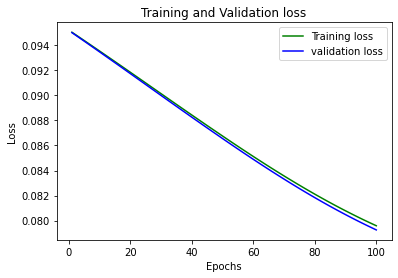

In [130]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## ii. Training Accuracy and Validation Accuracy

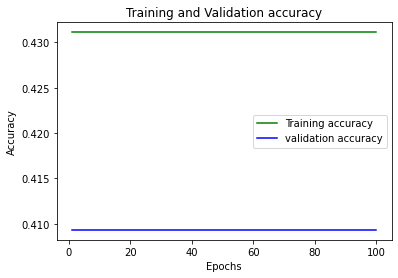

In [131]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
## D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]


In [132]:
 # Creating a `Sequential` model and add a Dense layer as the first layer.
classifier2 = tf.keras.models.Sequential()
classifier2.add(tf.keras.Input(shape=(11,)))
classifier2.add(tf.keras.layers.Dense(50, activation='relu'))

#classifier.add(tf.keras.layers.Dense(32,activation='relu'))
classifier2.add(Dense(9, activation = 'softmax'))
classifier2.output_shape

(None, 9)

In [133]:
classifier2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [134]:
history2=classifier2.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 2.1058 - accuracy: 0.3523 - val_loss: 1.9590 - val_accuracy: 0.4093
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.8280 - accuracy: 0.4311 - val_loss: 1.6615 - val_accuracy: 0.4093
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 1.5421 - accuracy: 0.4416 - val_loss: 1.3957 - val_accuracy: 0.4191
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 1.3514 - accuracy: 0.4532 - val_loss: 1.2728 - val_accuracy: 0.4363
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 1.2793 - accuracy: 0.4427 - val_loss: 1.2343 - val_accuracy: 0.4387
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 1.2508 - accuracy: 0.4448 - val_loss: 1.2181 - val_accuracy: 0.4191
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 1.2365 - accuracy: 0.4574 - val_loss: 1.2063 - val_accuracy: 0.4510
Epoch 8/100
3

In [135]:
results2 = classifier2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 1.1529 - accuracy: 0.5049


Accuracy proved by over  10% in classifier2.

In [ ]:
## E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

In [ ]:
## i. Training Loss and Validation Loss

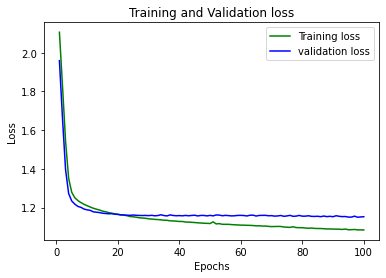

In [136]:
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## ii. Training Accuracy and Validation Accuracy

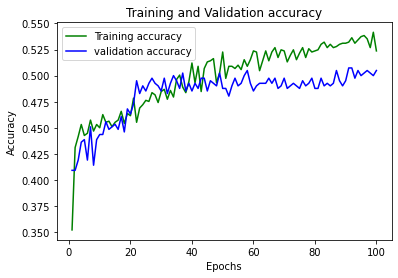

In [137]:
loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Observations: 
1)Classifier2 has improved accuracy over classfier1. 
2)Both the models validation loss is decreasing with each epoch.
3)Both the models validation accuracy is increasing with each epoch.
4)We used adam optimiser and loss as categorical_crossentropy for the classifier2 which performed better than SGD based classifier 
5)accuracy improved by 10% in Classifier2.

In [ ]:
##Part B -PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

In [ ]:
##1. Data Import and Exploration [5 Marks]


In [ ]:
#A. Read the .h5 file and assign to a variable. [2 Marks]


In [138]:
import numpy as np
import h5py

In [166]:

hf = h5py.File('/content/drive/My Drive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [ ]:
#B. Print all the keys from the .h5 file. [1 Marks]


In [167]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [83]:
#C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]


In [168]:
X_test_df = hf.get('X_test')
X_train_df = hf.get('X_train')
y_test_df = hf.get('y_test')
y_train_df = hf.get('y_train')

In [169]:
X_test_df.shape

(18000, 32, 32)

In [64]:
##2. Data Visualisation and preprocessing [13 Marks]


In [ ]:
#A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]


In [170]:
print(X_test_df.shape)
print(X_train_df.shape)
print(y_test_df.shape)
print(y_train_df.shape)

(18000, 32, 32)
(42000, 32, 32)
(18000,)
(42000,)


In [171]:
X_test_df

<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">

In [144]:
#B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]


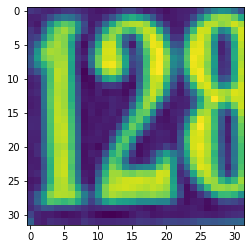

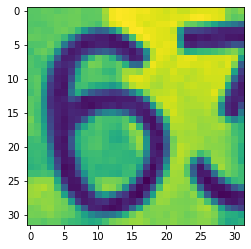

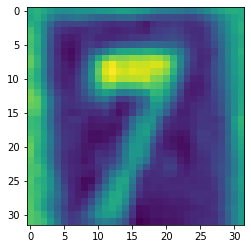

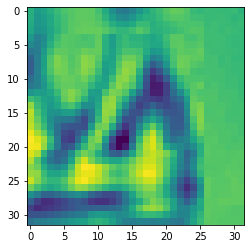

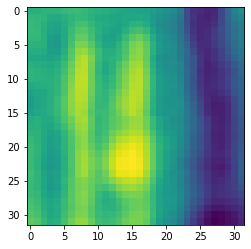

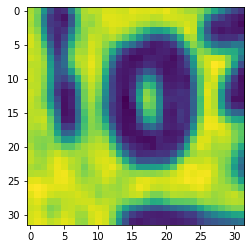

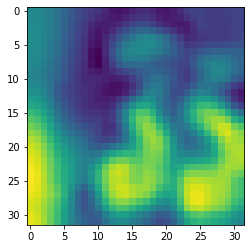

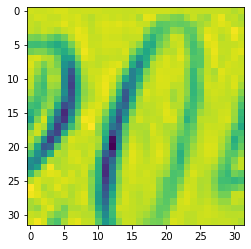

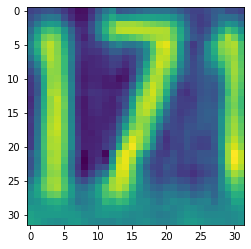

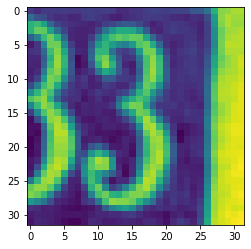

In [172]:
for x in range(10):
    plt.imshow(X_train_df[x])    # show first number in the dataset
    plt.show()


In [ ]:
#C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]


In [173]:
# reshaping X data: (n, 32, 32) => (n, 1024)

X_train_df = tf.reshape(X_train_df,[42000,1024])

X_test_df = tf.reshape(X_test_df,[18000,1024])

In [174]:
print(X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape)

(42000, 1024) (18000, 1024) (42000,) (18000,)


In [ ]:
#D. Normalise the images i.e. Normalise the pixel values. [2 Marks]


In [175]:
# Feature Scaling

X_train_nm = preprocessing.normalize(X_train_df)

X_test_nm = preprocessing.normalize(X_test_df)

In [ ]:
#E. Transform Labels into format acceptable by Neural Network [2 Marks]


In [176]:
y_train_df = np.array(y_train_df)
y_test_df = np.array(y_test_df)

In [177]:
# converting y data into categorical (one-hot encoding)
y_train_df = to_categorical(y_train_df)
y_test_df = to_categorical(y_test_df)

In [ ]:
#F. Print total Number of classes in the Dataset. [1 Marks]

In [178]:
print( y_train_df.shape, y_test_df.shape)

(42000, 10) (18000, 10)


Observation: Number of classes in dataset is 10.

In [155]:
##3. Model Training & Evaluation using Neural Network [12 Marks]


In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [ ]:
#A. Design a Neural Network to train a classifier. [3 Marks]

In [180]:
model = Sequential()

In [181]:
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:

#B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]


In [182]:

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [183]:
history_imgs = model.fit(X_train_nm, y_train_df, validation_data=(X_test_nm,y_test_df),batch_size = 200, epochs = 50, verbose = 1)


Epoch 1/50
210/210 [==============================] - 2s 8ms/step - loss: 2.3084 - accuracy: 0.0987 - val_loss: 2.3052 - val_accuracy: 0.0955
Epoch 2/50
210/210 [==============================] - 2s 7ms/step - loss: 2.3043 - accuracy: 0.0989 - val_loss: 2.3060 - val_accuracy: 0.1019
Epoch 3/50
210/210 [==============================] - 1s 7ms/step - loss: 2.3046 - accuracy: 0.0993 - val_loss: 2.3041 - val_accuracy: 0.1016
Epoch 4/50
210/210 [==============================] - 1s 7ms/step - loss: 2.3045 - accuracy: 0.0996 - val_loss: 2.3041 - val_accuracy: 0.1002
Epoch 5/50
210/210 [==============================] - 2s 7ms/step - loss: 2.3041 - accuracy: 0.0989 - val_loss: 2.3039 - val_accuracy: 0.1008
Epoch 6/50
210/210 [==============================] - 1s 7ms/step - loss: 2.3040 - accuracy: 0.1003 - val_loss: 2.3034 - val_accuracy: 0.1049
Epoch 7/50
210/210 [==============================] - 1s 7ms/step - loss: 2.3038 - accuracy: 0.1040 - val_loss: 2.3042 - val_accuracy: 0.1044
Epoch 

In [ ]:
#C. Evaluate performance of the model with appropriate metrics. [2 Marks]


In [184]:
results = model.evaluate(X_test_nm, y_test_df)


563/563 [==============================] - 2s 3ms/step - loss: 1.4030 - accuracy: 0.5304


In [ ]:
#D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
#observations on the same. [4 Marks]

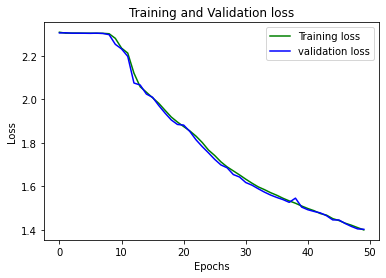

In [185]:
loss_train = history_imgs.history['loss']
loss_val = history_imgs.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

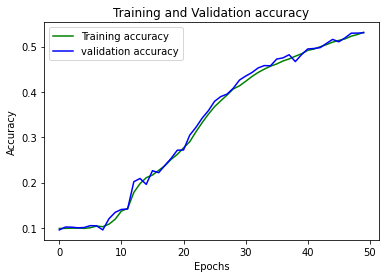

In [186]:
loss_train = history_imgs.history['accuracy']
loss_val = history_imgs.history['val_accuracy']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Observations:
1) Validation accuracy and training accuracy is mostly increasing for the model with each epoch.
2) Loss and validation loss is decreasing for each epoch for the model.
